In [1]:
import os
import numpy as np
from numpy import linalg as LA
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data

In [2]:
PATH = '../data'

In [3]:
os.listdir(f'{PATH}')

['out.json', 'dump.csv']

In [4]:
esdf = pd.read_json(f'{PATH}/out.json')

In [5]:
cefs = [h['_source'] for h in esdf.hits.hits]

In [6]:
df = pd.DataFrame(cefs)

# Features

In [7]:
df.act.unique()

array(['allow', 'alert', 'deny', 'block-url', 'reset-both'], dtype=object)

In [8]:
def get_df(df):
    acts = df.act.unique()
    srcs = df.src.unique()
    src_dict = {v: i for i, v in enumerate(srcs)}
    dff = pd.DataFrame()
    for a in acts:
        dff[a] = df.act == a
        dff[a] = dff[a].astype(int)
    dff['src'] = df.src
    return dff

In [9]:
dff = get_df(df)

In [10]:
dff = dff.groupby('src').sum()

In [11]:
dff.reset_index(inplace=True)

# Process

In [12]:
pca = PCA(n_components=2)

In [13]:
principalComponents = pca.fit_transform(dff[df.act.unique()])

In [14]:
principalDf = pd.DataFrame(
    data = principalComponents, 
    columns = ['c1', 'c2']
)

In [15]:
finalDF = pd.concat([principalDf, dff.src], axis=1)

# Anomaly

In [16]:
P = pca.components_

In [17]:
part = np.eye(2) - np.matmul(P, P.T)

In [18]:
norms = [LA.norm(np.matmul(part, pc)) for pc in principalComponents]

In [19]:
principalComponents[np.argmax(norms)]

array([-1.67817894, 37.64320824])

In [20]:
finalDF.query('c2 > 37.64320823 and c2 < 37.64320825')

,c1,c2,src
1071,-1.678179,37.643208,100.94.68.1


## Most anomalous source host with respect to act is 100.94.68.1

In [21]:
df.query('src == "100.94.68.1"')['act']

8       alert
129     alert
142     alert
219     alert
428     alert
625     alert
765     alert
834     alert
1275    alert
1505    alert
1622    alert
1678    alert
1870    alert
2101    alert
2172    alert
2228    alert
2712    alert
2807    alert
2960    alert
3128    alert
3146    alert
3147    alert
3151    alert
3199    alert
3318    alert
3653    alert
3946    alert
4263    alert
4565    alert
5015    alert
5054    alert
5175    alert
5180    alert
5281    alert
5298    alert
5596    alert
5620    alert
6714    alert
Name: act, dtype: object

# Plot

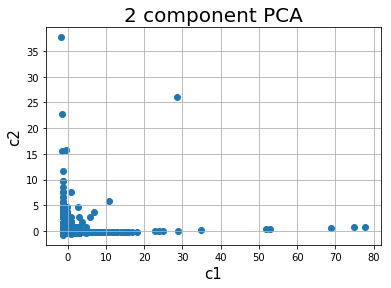

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('c1', fontsize = 15)
ax.set_ylabel('c2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['c1'], principalDf['c2'])
ax.grid()